<a href="https://colab.research.google.com/github/adewoleopeyemi/RealTimeNudityDetectionAlgorithm/blob/master/NudityDetectionAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip '/content/drive/My Drive/themainandrealtraindatasetnu.zip' -d '/content/drive/My Drive/trainnudesdatasets'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1752  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1753  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1754  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1755  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1756  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1757  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1758  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1759  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1760  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1761  
  inflating: /content/drive/My Drive/trainnudesdatasets/traindatasetnu/img1762  
  inflating: /content/drive/My Drive/trainnudesdatasets/tr

In [ ]:
import numpy as np
import os
from PIL import Image

path = 'drive/My Drive/traindatasetnonnu/'

In [2]:
listing = os.listdir(path=path)


non_nudes_imgs = []
i = 0
for file in listing:
  try:
    img = Image.open(path+file) 
    img = img.resize((124, 124))
    image = np.array(img, dtype='float16')/255.
    if image.shape==(124, 124, 3):
      non_nudes_imgs.append(image)
    
    print(i)
    i+=1
  except:
    continue

Streaming output truncated to the last 5000 lines.
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1

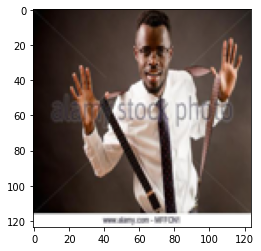

In [3]:
import matplotlib.pyplot as plt
plt.imshow(non_nudes_imgs[12].astype('float'))

In [4]:
non_nudes_imgs = np.array(non_nudes_imgs)

In [5]:
non_nudes_imgs.shape

(5796, 124, 124, 3)

In [22]:
nudes = '/content/drive/My Drive/trainnudesdatasets/traindatasetnu/'

listing = os.listdir(path=nudes)
print(len(listing))

nudes_imgs = []
i = 0
Image.open(nudes+'img1000')
for x in listing:
  try:
    img = Image.open(nudes+x)
    img = img.resize((124, 124))
    img = np.array(img, dtype='float16')/255.
    if img.shape==(124, 124, 3):
      nudes_imgs.append(img)
    print(i)
    i+=1
  except:
    continue

Streaming output truncated to the last 5000 lines.
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
10

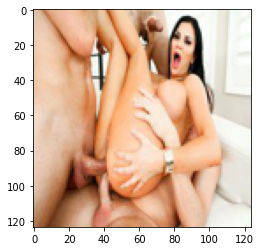

In [24]:
import matplotlib.pyplot as plt
plt.imshow(nudes_imgs[1000].astype('float'))
nudes_imgs = np.array(nudes_imgs)

In [36]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [26]:
nudes_target = np.zeros(len(nudes_imgs))
non_nudes_target = np.ones(len(non_nudes_imgs))

In [27]:
train_size_nudes = int(len(nudes_imgs)*0.7)
train_size_non_nudes = int(len(non_nudes_imgs)*0.7)

X_train_nudes = nudes_imgs[:train_size_nudes]
y_train_nudes = nudes_target[:train_size_nudes]

X_train_non_nudes = non_nudes_imgs[:train_size_nudes]
y_train_non_nudes = non_nudes_target[:train_size_nudes]


X_test_nudes = nudes_imgs[train_size_nudes:]
y_test_nudes = nudes_target[train_size_nudes:]

X_test_non_nudes = non_nudes_imgs[train_size_nudes:]
y_test_non_nudes = non_nudes_target[train_size_nudes:]

In [28]:
nudes_imgs.shape

(5775, 124, 124, 3)

In [29]:
nudes_imgs = nudes_imgs.reshape((5775, 124, 124, 3))

In [30]:
non_nudes_imgs.shape

(5796, 124, 124, 3)

In [31]:
non_nudes_imgs = non_nudes_imgs.reshape((5796, 124, 124, 3))

In [34]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top=False, 
                  input_shape =(124, 124, 3))


58892288/58889256 [==============================] - 1s 0us/step


In [37]:
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 15,894,849
Trainable params: 15,894,849
Non-trainable params: 0
_________________________________________________________________


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 124, 124, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 124, 124, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 124, 124, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 62, 62, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 62, 62, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 62, 62, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 31, 31, 128)       0     

In [41]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [44]:
X_train = np.concatenate([X_train_nudes, X_train_non_nudes])
y_train = np.concatenate([y_train_nudes, y_train_non_nudes])

In [47]:
history = model.fit(X_train, y_train, batch_size=10, validation_split=0.1, shuffle=True)

728/728 [==============================] - 47s 64ms/step - loss: 0.0210 - acc: 0.9924 - val_loss: 0.0122 - val_acc: 0.9963


In [49]:
X_test = np.concatenate([X_test_nudes, X_test_non_nudes])
y_test = np.concatenate([y_test_nudes, y_test_non_nudes])

In [50]:
model.evaluate(X_test, y_test)

109/109 [==============================] - 5s 43ms/step - loss: 0.2829 - acc: 0.9455


[0.2829246520996094, 0.9455118775367737]

In [56]:
test = X_test[1]

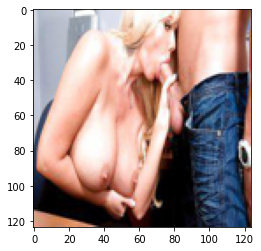

In [57]:
plt.imshow(test.astype(float))

In [62]:
prediction = model.predict(test.reshape(1, 124, 124, 3))
if prediction <= 0.5:
  print('This is image contains nudity, please do not view if you are below 18')
else:
  print('This image doesnt contain nudity')

This is image contains nudity, please do not view if you are below 18


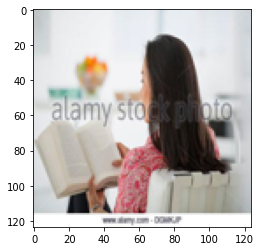

In [65]:
test2 = X_test[3400]
plt.imshow(test2.astype(float))

In [66]:
test2_prediction = model.predict(test2.reshape(1, 124, 124, 3))

In [68]:
if test2_prediction <= 0.5:
  print('This is image contains nudity, please do not view if you are below 18')
else:
  print('This image doesnt contain nudity')

This image doesnt contain nudity
